In [23]:
def generate_output(input_dict):
    def dfs(node, path):
        if isinstance(node, dict):
            for key, value in node.items():
                dfs(value, path + [key])
        else:
            output[path[-1]] = path[:-1]

    output = {}
    dfs(input_dict, [])
    return output

# Example usage:
input_dict = {"abc":{"def":{"ghi":{"jkl":{"mno":{"pqr":{"stu":{"vwx":{"yz":"you are finally here !!!"}}}}}}}}}
result = generate_output(input_dict)
print(result)


{'yz': ['abc', 'def', 'ghi', 'jkl', 'mno', 'pqr', 'stu', 'vwx']}


In [31]:
def min_distance_between_horses(stalls, k):
    stalls.sort()

    def is_valid(distance):
        horses_assigned = 1
        current_position = stalls[0]

        for stall in stalls[1:]:
            if stall - current_position >= distance:
                horses_assigned += 1
                current_position = stall

        return horses_assigned >= k

    left, right = 0, stalls[-1] - stalls[0]

    while left < right:
        mid = (left + right) // 2

        if is_valid(mid):
            left = mid + 1
        else:
            right = mid

    return left - 1

# Example usage
stalls = [1, 2, 4, 8, 9]
k = 3
result = min_distance_between_horses(stalls, k)
print("Largest minimum distance:", result)



Largest minimum distance: 3


In [28]:
def print_pattern(N, M):
    # Calculate the number of rows in the upper half and lower half patterns
    upper_half = (N - 1) // 2

    # Print the upper half pattern
    for i in range(upper_half):
        row = '.|.' * (2 * i + 1)
        row = row.center(M, '-')
        print(row)

    # Print the middle row with 'WELCOME'
    print('WELCOME'.center(M, '-'))

    # Print the lower half pattern
    for i in range(upper_half, 0, -1):
        row = '.|.' * (2 * i - 1)
        row = row.center(M, '-')
        print(row)

# Get input values for N and M
N, M = map(int, input("Enter the size of the mat (N and M, separated by a space): ").split())

# Check if N is an odd natural number and M is 3 times N
if N % 2 == 0 or M != 3 * N:
    print("Invalid input! N must be an odd natural number, and M must be 3 times N.")
else:
    print_pattern(N, M)

Enter the size of the mat (N and M, separated by a space):  7 21


---------.|.---------
------.|..|..|.------
---.|..|..|..|..|.---
-------WELCOME-------
---.|..|..|..|..|.---
------.|..|..|.------
---------.|.---------


In [10]:
def print_pattern(N, M):
    # Calculate the number of rows in the upper half and lower half patterns
    upper_half = (N - 1) // 2

    # Print the upper half pattern
    for i in range(upper_half):
        row = '.|.' * (2 * i + 1)
        row = row.center(M, '-')
        print(row)

    # Print the middle row with 'WELCOME'
    print('WELCOME'.center(M, '-'))

    # Print the lower half pattern
    for i in range(upper_half, 0, -1):
        row = '.|.' * (2 * i - 1)
        row = row.center(M, '-')
        print(row)

# Get input values for N and M
N, M = map(int, input("Enter the size of the mat (N and M, separated by a space): ").split())

# Check if N is an odd natural number and M is 3 times N
if N % 2 == 0 or M != 3 * N:
    print("Invalid input! N must be an odd natural number, and M must be 3 times N.")
else:
    print_pattern(N, M)

Enter the size of the mat (N and M, separated by a space):  11 33


---------------.|.---------------
------------.|..|..|.------------
---------.|..|..|..|..|.---------
------.|..|..|..|..|..|..|.------
---.|..|..|..|..|..|..|..|..|.---
-------------WELCOME-------------
---.|..|..|..|..|..|..|..|..|.---
------.|..|..|..|..|..|..|.------
---------.|..|..|..|..|.---------
------------.|..|..|.------------
---------------.|.---------------


In [11]:
def fourSum(nums, target):
    nums.sort()  # Sort the input array
    n = len(nums)
    result = []

    # Iterate through the array
    for a in range(n - 3):
        # Skip duplicates for the first number
        if a > 0 and nums[a] == nums[a - 1]:
            continue

        # Iterate through the remaining numbers
        for b in range(a + 1, n - 2):
            # Skip duplicates for the second number
            if b > a + 1 and nums[b] == nums[b - 1]:
                continue

            # Use two-sum approach for the remaining two numbers
            c, d = b + 1, n - 1
            while c < d:
                sum = nums[a] + nums[b] + nums[c] + nums[d]
                if sum == target:
                    result.append([nums[a], nums[b], nums[c], nums[d]])

                    # Skip duplicates for the third and fourth numbers
                    while c < d and nums[c] == nums[c + 1]:
                        c += 1
                    while c < d and nums[d] == nums[d - 1]:
                        d -= 1

                    c += 1
                    d -= 1
                elif sum < target:
                    c += 1
                else:
                    d -= 1

    return result

In [12]:
nums = [1, 0, -1, 0, -2, 2]
target = 0
print(fourSum(nums, target))  

[[-2, -1, 1, 2], [-2, 0, 0, 2], [-1, 0, 0, 1]]


# SQL


# 1 
The outer query selects all columns from the “runners” table.
The subquery (inner query) retrieves the “winner_id” values from the “races” table.
The purpose of this query is to find all runners who have not won any race. However, there is an issue with using NOT IN in this context. If the “races” table contains any NULL values in the “winner_id” column, the entire query will return an empty result set. This happens because NOT IN treats NULL as an unknown value, making the condition unresolvable.




alternate code
SELECT * FROM runners
LEFT JOIN races ON runners.id = races.winner_id
WHERE races.winner_id IS NULL;


# 2 

SELECT a.id
FROM test_a a
LEFT JOIN test_b b ON a.id = b.id
WHERE b.id IS NULL;

# 3
SELECT u.username, id.user_id, id.training_id, id.training_date
FROM users u
JOIN (
    SELECT user_id, training_id, training_date,
           COUNT(*) OVER (PARTITION BY user_id, training_id, training_date) AS count
    FROM training_details
    WHERE count > 1
) AS id ON u.user_id = id.user_id
ORDER BY id.user_id ASC, id.training_date DESC;


# 4

SELECT
    Manager_Id,
    (SELECT Emp_name FROM Employees WHERE Emp_Id in Manager_Id) AS Manager,
    AVG(Salary) AS Average_Salary_Under_Manager
FROM Employees
WHERE Manager_Id IS NOT NULL
GROUP BY Manager_Id;


# Statistics


# 1 

In statistics, Six Sigma is a methodology focused on process improvement by reducing defects or variations to achieve near-perfect quality with only 3.4 defects per million opportunities. It is a data-driven approach that aims to enhance customer satisfaction and decrease operational costs by identifying and eliminating errors in processes. For example, in a manufacturing setting, Six Sigma can be applied to ensure that products meet specific quality standards by minimizing variations in the production process.
The term "Six Sigma" refers to the statistical measurement of standard deviations from the mean in a normal distribution. The goal is to reach a level where only 3.4 defects per million opportunities occur, indicating a highly efficient and reliable process. This methodology emphasizes measuring, analyzing, and improving processes to enhance overall quality and customer satisfaction.
By obsessively focusing on reducing defects and variations, organizations can increase customer loyalty, reduce costs, improve quality, and boost profitability. The name "Six Sigma" signifies the goal of achieving a performance level that is six standard deviations away from the mean, ensuring minimal variability and consistent meeting or exceeding of customer expectations.

# 2

Exponential Distributions:
Exponential distributions do not exhibit a log-normal or Gaussian distribution.
These distributions describe the time between events in a process that occurs at a constant rate (e.g., radioactive decay, time until the next earthquake).
Example: The duration of a phone call or the time until the next earthquake1.


Categorical Data:
Any type of data that is categorical does not follow these distributions.
Categorical data consists of distinct categories or labels (e.g., colors, yes/no responses, types of fruits).
Example: The color of a car or the type of fruit in a basket.

# 3

Minimum (Min): The smallest value in the dataset.

First Quartile (Q1): The value below which 25% of the data falls. It represents the lower 25% of the dataset.

Median (Q2): The middle value when the data is sorted. It divides the dataset into two equal halves.

Third Quartile (Q3): The value below which 75% of the data falls. It represents the upper 25% of the dataset.

Maximum (Max): The largest value in the dataset.

Here’s an example to illustrate the five-number summary:

Suppose we have a dataset of exam scores (out of 100) for a class of students: [ 65, 72, 78, 82, 85, 88, 92, 95, 98 ]

Minimum (Min): The smallest score is 65.

First Quartile (Q1): The 25th percentile score is 78.

Median (Q2): The middle score is 85.

Third Quartile (Q3): The 75th percentile score is 92.

Maximum (Max): The highest score is 98.

# 4

In statistics, correlation measures the strength and direction of the linear relationship between two continuous random variables. It helps us understand how changes in one variable relate to changes in another. Here are some key points:

A positive correlation means that as one variable increases, the other tends to increase as well.
A negative correlation indicates that as one variable increases, the other tends to decrease.
The correlation coefficient ranges from -1 to +1, where:
-1: Perfect negative correlation
0: No linear correlation
+1: Perfect positive correlation


In [15]:
import pandas as pd


In [18]:
import pandas as pd

df = pd.read_csv(r'E:\\data_science\\project\\eda\\UCI_Credit_Card.csv')


In [19]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [20]:
matrix = df.corr()
print(matrix)

                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.02

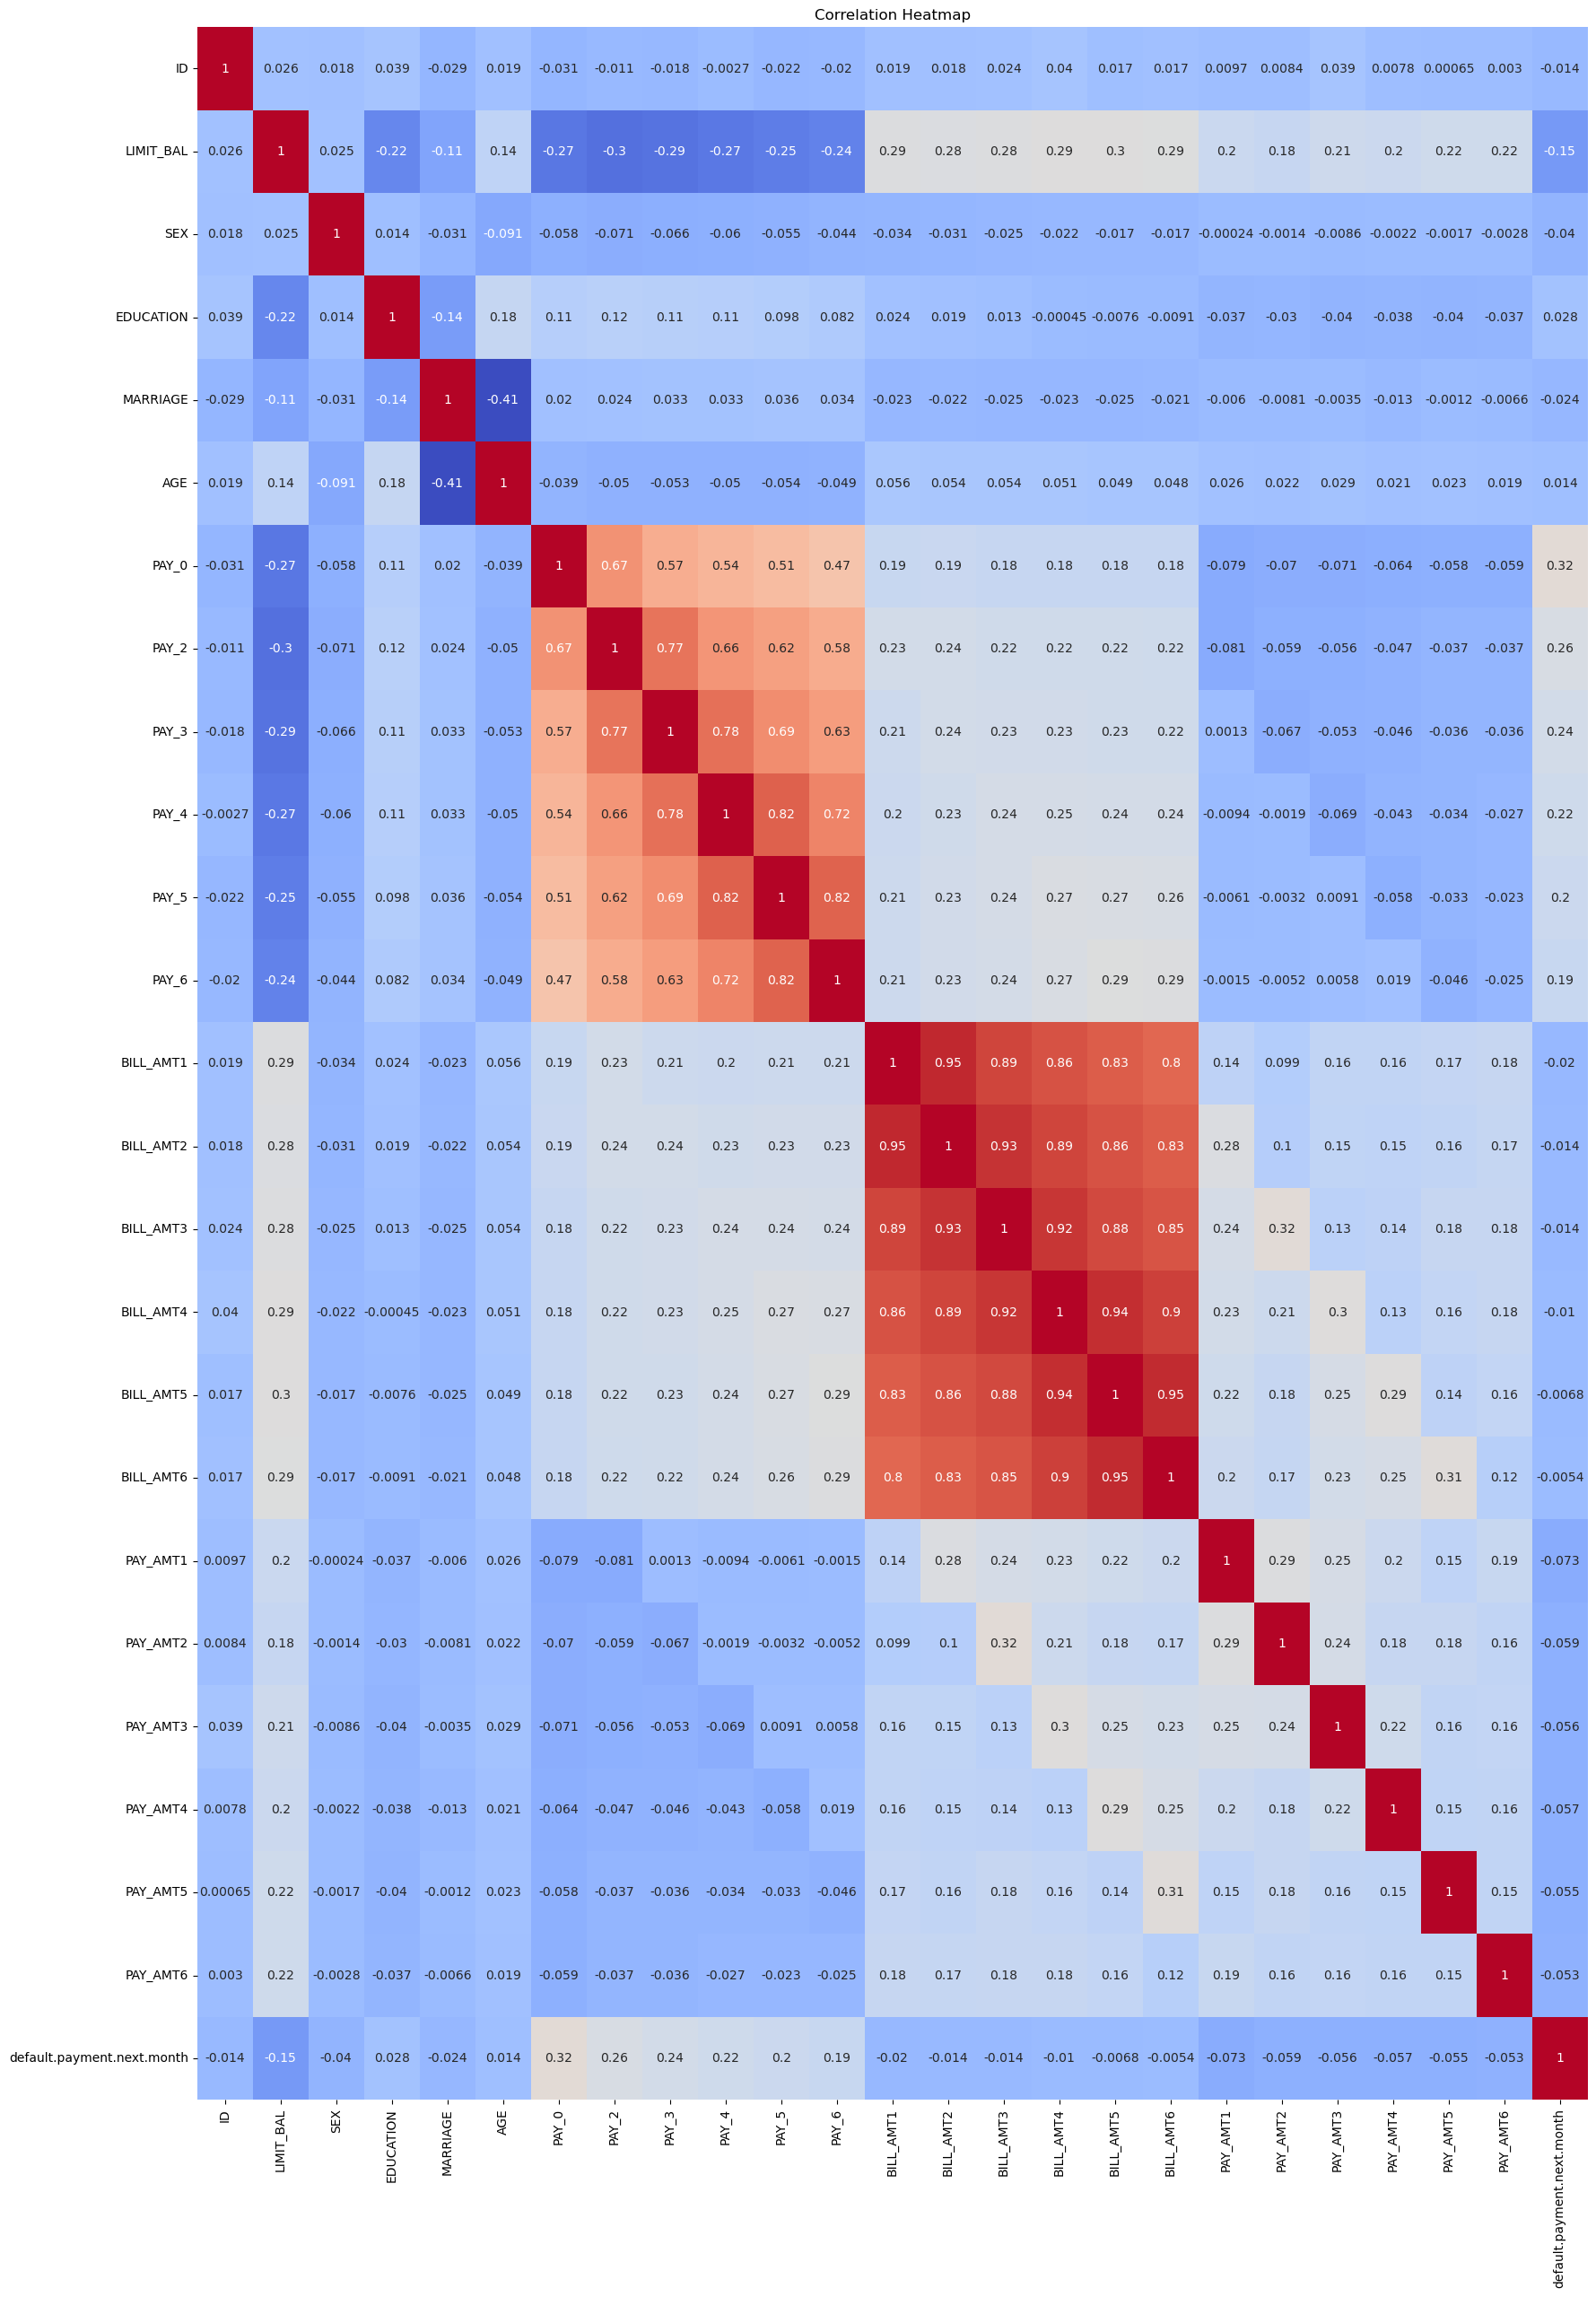

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(20,30))
sns.heatmap(matrix, annot=True, cmap='coolwarm', cbar=False)
plt.title("Correlation Heatmap")
plt.show()